In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('scaler_apollo_hospitals.csv')
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [3]:
print("# rows: {}\n# columns: {}".format(df.shape[0], df.shape[1]))

# rows: 1338
# columns: 8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [5]:
# There are no missing values present in the data.

In [6]:
df.describe()

,Unnamed: 0,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,10.221233,1.094918,33176.058296
std,386.391641,14.049960,2.032796,1.205493,30275.029296
min,0.000000,18.000000,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,11.567500,2.000000,41599.500000
max,1337.000000,64.000000,17.710000,5.000000,159426.000000


In [7]:
# check for duplicates
print("Number of duplicates: {}".format(df.duplicated().sum()))

Number of duplicates: 0


In [8]:
# check number of unique values in each column
for col in df.columns:
    print("{:15}: {}".format(col, df[col].nunique()))

Unnamed: 0     : 1338
age            : 47
sex            : 2
smoker         : 2
region         : 4
viral load     : 462
severity level : 6
hospitalization charges: 1320


In [9]:
# change datatype of severity_level to object
df['severity level'] = df['severity level'].astype('object')

In [10]:
cat_cols = ['sex', 'smoker', 'region', 'severity level']
num_cols = ['age', 'viral load']
target = "hospitalization charges"

In [ ]:
# Univariate Analysis

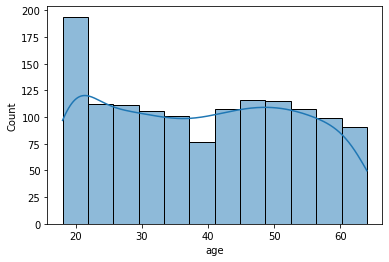

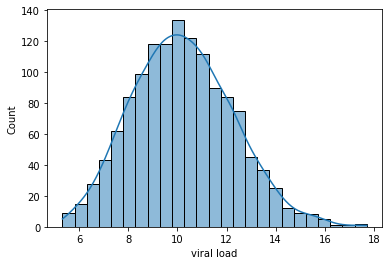

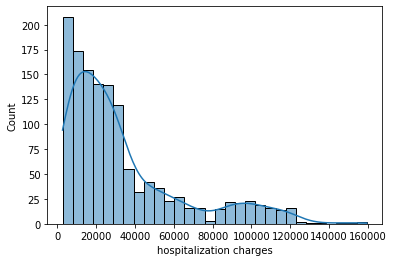

In [11]:
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.show()
    
sns.histplot(df[target], kde=True)
plt.show()

1. age: Follows somewhat uniform distribution
2. viral load: Looks like the normal distribution
3. hospitalization charges: is right skewed

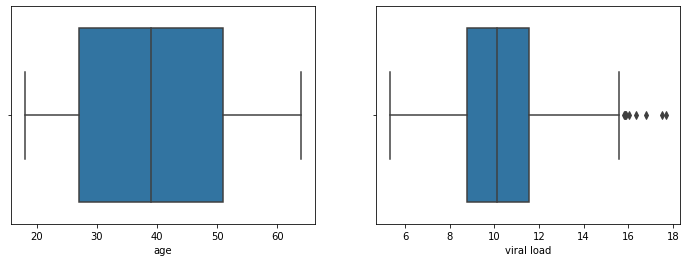

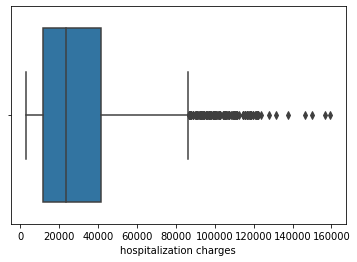

In [12]:
# outliers detection using box plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

for i, col in enumerate(num_cols):
    sns.boxplot(x=col, data=df, ax=axs[i])

plt.show()    
sns.boxplot(x=target, data=df)
plt.show()

1. age doesn't have any outliers
2. viral load and hospitalization charges have outliers.

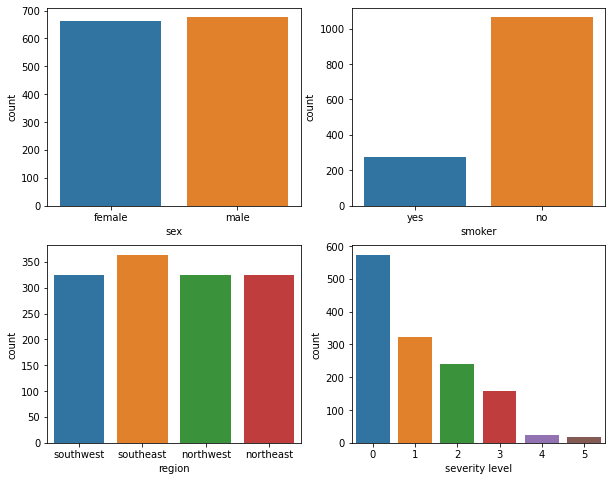

In [13]:
nrows=2
ncols=2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))

index=0
for i in range(nrows):
    for j in range(ncols):
        sns.countplot(x=cat_cols[index], data=df, ax=axs[i,j])
        index += 1

1. sex & ragion have almost equal number of values in each category.
2. Most of the patients are non-smoker.
3. Number of patients decreses as severity level increses.

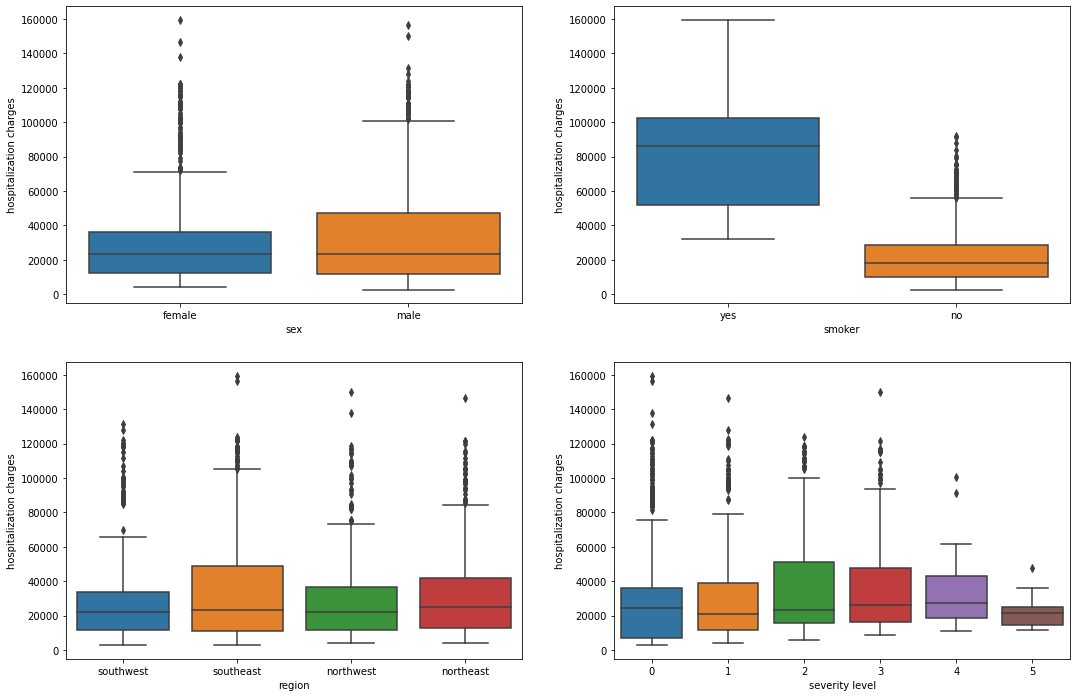

In [15]:
# Bivariate Analysis
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
index = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(y=target, x=cat_cols[index], data=df, ax=axs[i, j])
        index += 1 
plt.show()

1. It is quite evident from the charts that smoker patients will have high hospitalization charges.
After comparing the medians for sex, seems like both genders have similar hospitalization charges. 
(Will validation using hypothesis testing)
2. Patients living in southeast and northeast, have slightly higher hospitalization charges as 
compared to southweat and northwest respectively.
3. As severity level increses from 1 to 5, hospitalization charges also increses.

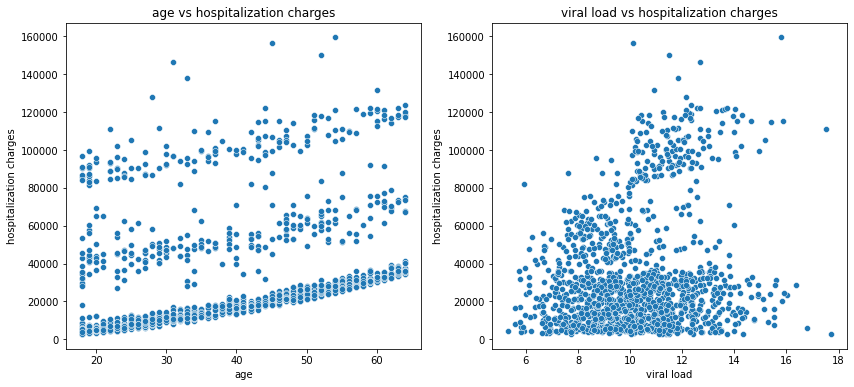

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
index = 0
for i in range(2):
    sns.scatterplot(y=target, x=num_cols[index], data=df, ax=axs[i])
    axs[i].set_title("{} vs hospitalization charges".format(num_cols[index]))
    index += 1 
plt.show()

1. There seems to be a slight correlation between hospitalization charges (in different ranges) and age
2. There seems to be no correlation between hospitalization charges and viral load

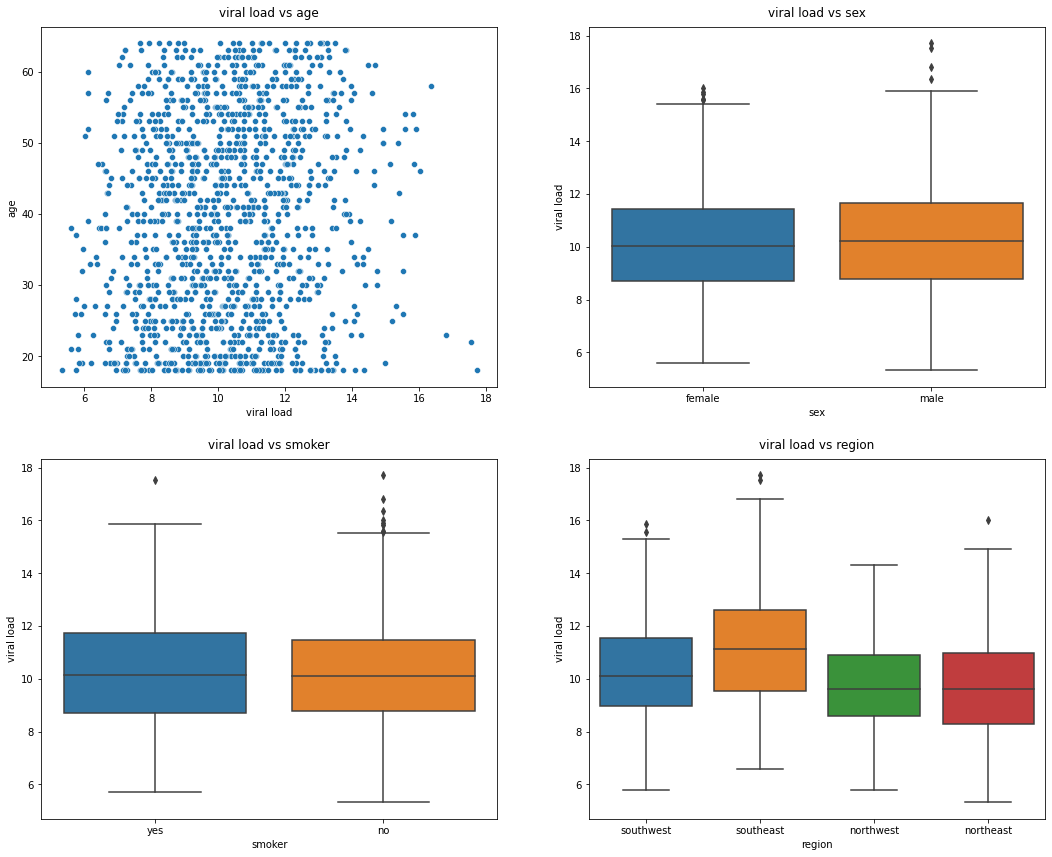

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 8))
plt.subplots_adjust(top=1.5)

sns.scatterplot(x='viral load', y='age', data=df, ax=axs[0,0])
sns.boxplot(y='viral load', x='sex', data=df, ax=axs[0,1])
sns.boxplot(y='viral load', x='smoker', data=df, ax=axs[1,0])
sns.boxplot(y='viral load', x='region', data=df, ax=axs[1,1])

axs[0,0].set_title("viral load vs age", pad=10)
axs[0,1].set_title("viral load vs sex", pad=10)
axs[1,0].set_title("viral load vs smoker", pad=10)
axs[1,1].set_title("viral load vs region", pad=10)
plt.show()

1. Seems like viral load is not related to varibales age, sex and smoker
2. Patients from southwest have higher viral load as compared to other regions.

In [19]:
# Mutlivariate Analysis

In [20]:
corr = df.drop(columns=['Unnamed: 0']).corr()
corr

,age,viral load,hospitalization charges
age,1.000000,0.109300,0.299008
viral load,0.109300,1.000000,0.198388
hospitalization charges,0.299008,0.198388,1.000000


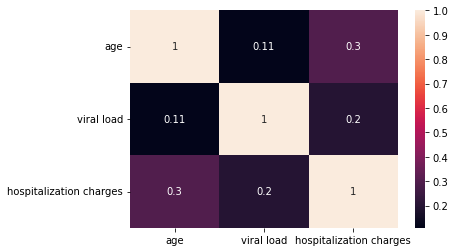

In [21]:
sns.heatmap(corr, annot=True)
plt.show()

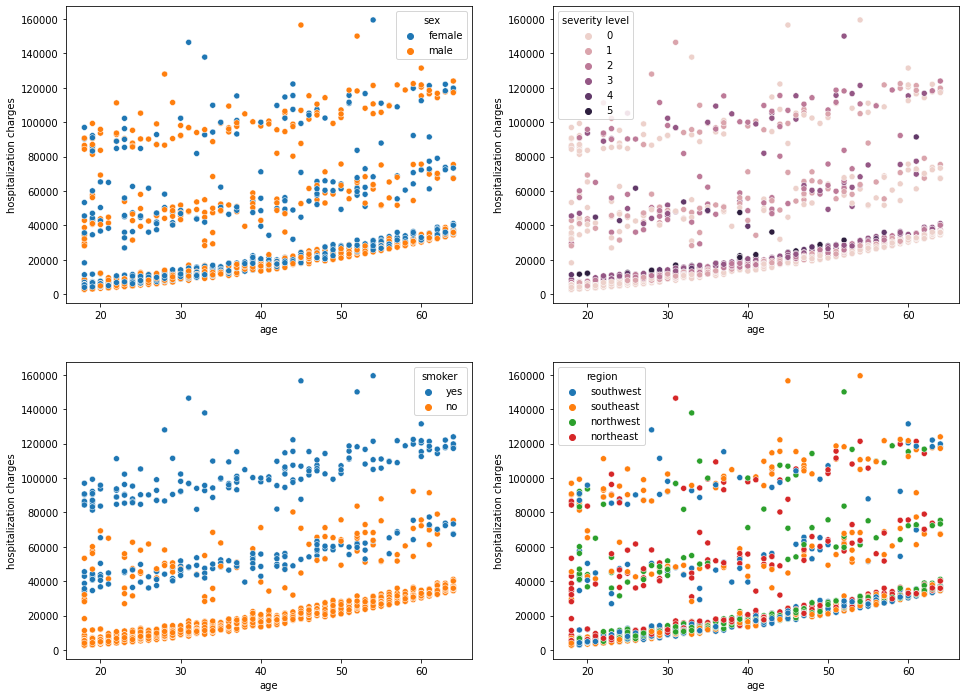

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

sns.scatterplot(y=target, x='age', data=df, hue='sex', ax=axs[0, 0])
sns.scatterplot(y=target, x='age', data=df, hue='severity level', ax=axs[0,1])
sns.scatterplot(y=target, x='age', data=df, hue='smoker', ax=axs[1,0])
sns.scatterplot(y=target, x='age', data=df, hue='region', ax=axs[1,1])
plt.show()

There is no any specific patterns, only distinguishes clearly that smoker patients 
will have high hospitalization charges.

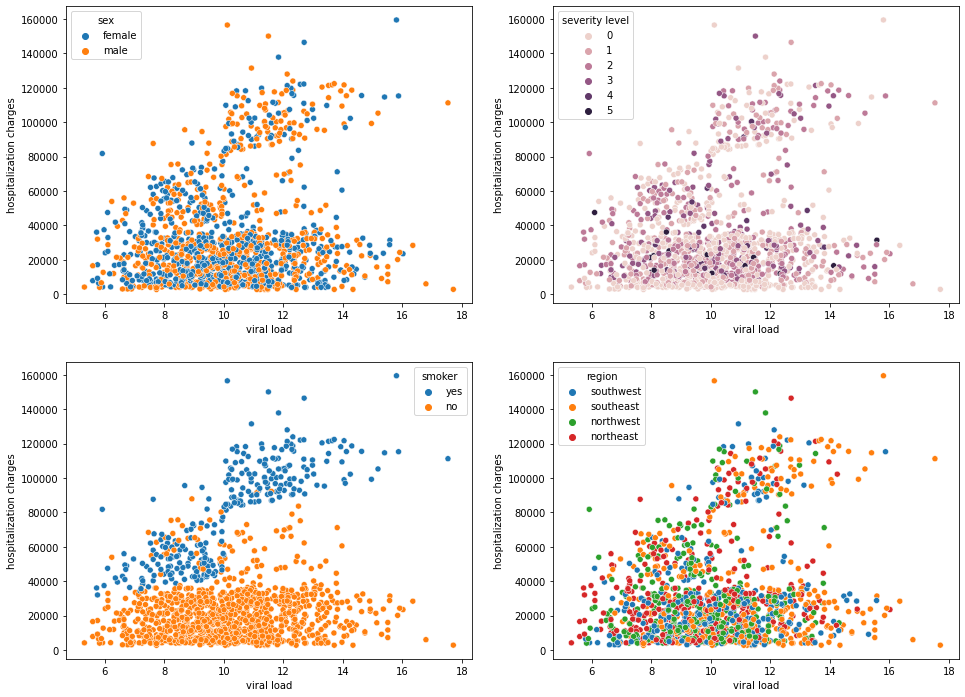

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

sns.scatterplot(y=target, x='viral load', data=df, hue='sex', ax=axs[0, 0])
sns.scatterplot(y=target, x='viral load', data=df, hue='severity level', ax=axs[0,1])
sns.scatterplot(y=target, x='viral load', data=df, hue='smoker', ax=axs[1,0])
sns.scatterplot(y=target, x='viral load', data=df, hue='region', ax=axs[1,1])
plt.show()

There is no any specific patterns, only distinguishes clearly that smoker patients will have
high hospitalization charges.

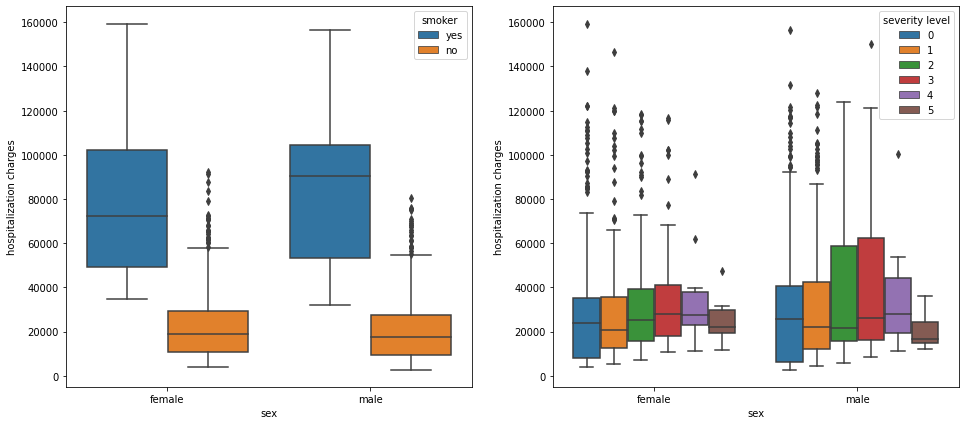

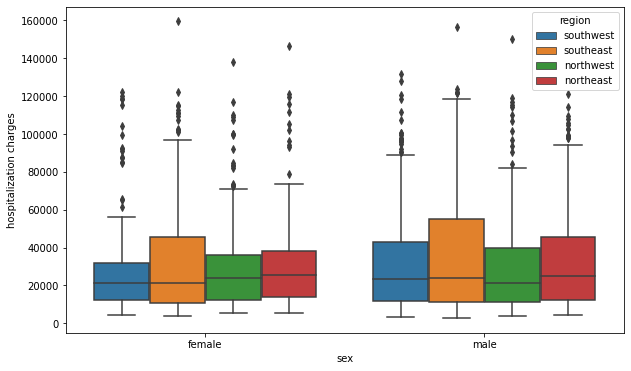

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

sns.boxplot(y=target, x='sex', hue='smoker', data=df, ax=axs[0])
sns.boxplot(y=target, x='sex', hue='severity level', data=df, ax=axs[1])
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(y=target, x='sex', hue='region', data=df)
plt.show()

1. Male smoker patients have high hospitalization charges as compared to Female smoker patients.
2. Female with severity level 3 & 4 will have high hospitalization charges while male with severity level 0 & 4 will 
have almost similary hospitalization charges.

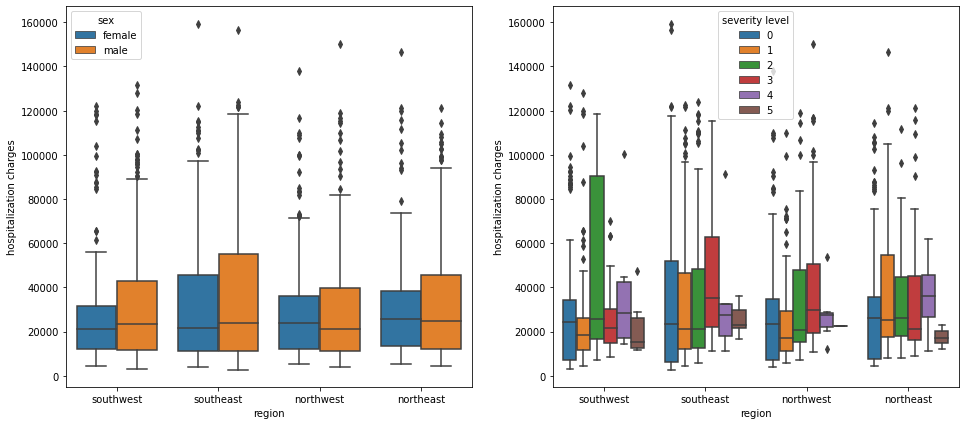

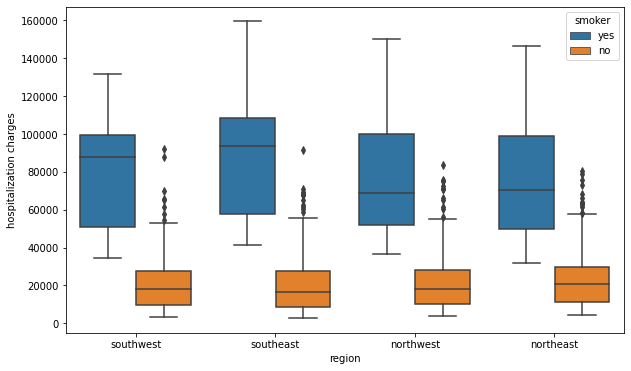

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

sns.boxplot(y=target, x='region', hue='sex', data=df, ax=axs[0])
sns.boxplot(y=target, x='region', hue='severity level', data=df, ax=axs[1])
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(y=target, x='region', hue='smoker', data=df)
plt.show()

1. male patients in southweat & southeast regions will have slightly higher hospitalization charges as 
compare females while female patients in northweat & northeast will have slightly higher hospitalization 
charges as compared to male patients.
1. smoker patients living in southwest & southeast regions will have high hospitalization charges as 
compared to smoker patients living in north regions.
3. Patients living in southwest & northeast and haveseverity level-4 will have higherhospitalization charges as 
compared to other severity level patients
4. Patients living in southeast & northwest and haveseverity level-3 will have higherhospitalization charges as 
compared to other severity level patients

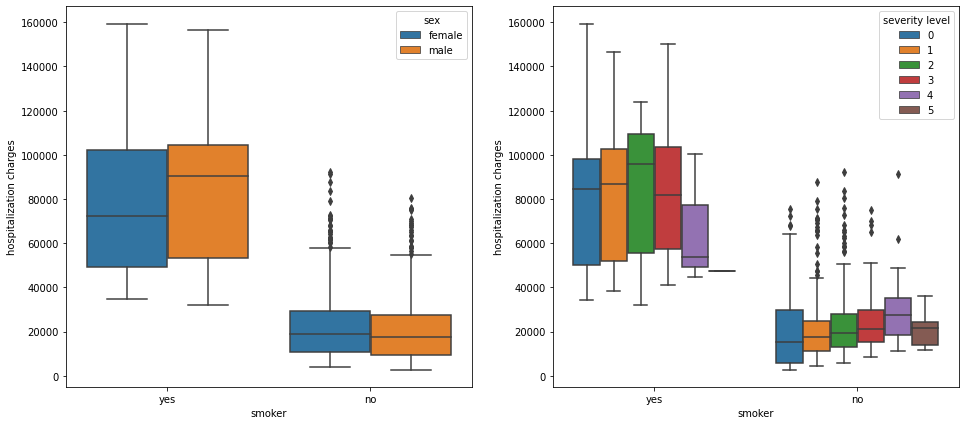

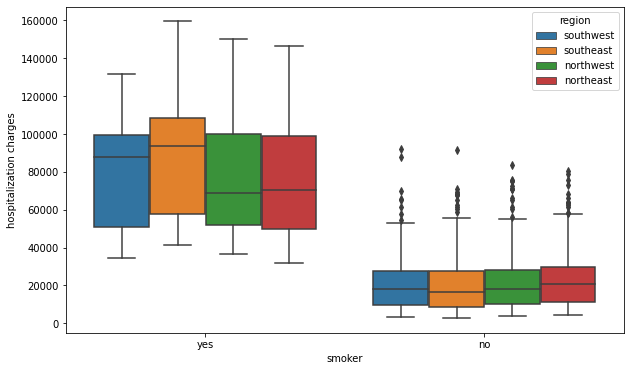

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

sns.boxplot(y=target, x='smoker', hue='sex', data=df, ax=axs[0])
sns.boxplot(y=target, x='smoker', hue='severity level', data=df, ax=axs[1])
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(y=target, x='smoker', hue='region', data=df)
plt.show()

1. In smoker patients, patients with severity level - 2 will have higher hospitalization charges as 
comapred to other severity levels.
2. In non-smoker patients, patients with severity level - 4 will have higher hospitalization charges as 
compared to other severity lavels.
3. In smoker patients, patients living in southwest region will have higherhospitalization charges as 
compared to other regions

# Outliers Treatment

In [27]:
# number of outliers for viral load
q1 = np.percentile(df['viral load'], 25)
q3 = np.percentile(df['viral load'], 75)
iqr = q3-q1
newdf = df[(df['viral load'] > (q1-1.5*iqr)) & (df['viral load'] < (q3+1.5*iqr))]
print("Number of outliers for viral load: {}".format(len(df)-len(newdf)))

Number of outliers for viral load: 9


newdf is the new data without outliers

# Hypothesis Testing

# Hypothesis Testing - 1
1. Null Hypothesis: Mean of hospitalization charges are same for both types of people.
2. Alternate Hypothesis: Mean of hospitalization charges are greater for smoker than those who don't smoke.
3. Significance Level: 0.05

Here we will be using right tailed 2-sample T-test.

In [28]:
smoker = newdf[newdf['smoker']=='yes']['hospitalization charges']
non_smoker = newdf[newdf['smoker']=='no']['hospitalization charges']

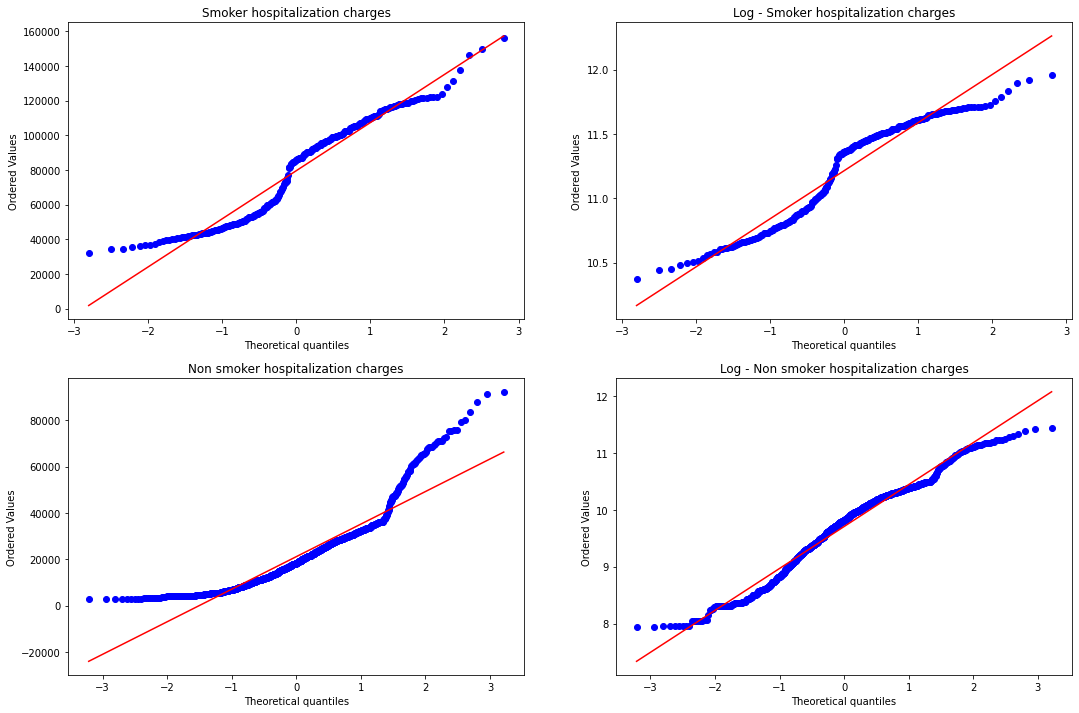

In [29]:
# normality check before and after log transformations
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

stats.probplot(smoker, plot=axs[0,0])
stats.probplot(np.log(smoker), plot=axs[0,1])
stats.probplot(non_smoker, plot=axs[1,0])
stats.probplot(np.log(non_smoker), plot=axs[1,1])

axs[0,0].set_title("Smoker hospitalization charges")
axs[0,1].set_title("Log - Smoker hospitalization charges")
axs[1,0].set_title("Non smoker hospitalization charges")
axs[1,1].set_title("Log - Non smoker hospitalization charges")
plt.show()

After taking the log, values looks much closer to normal distribution, so we will do the test on the 
log-transformed values.


In [30]:
res = stats.ttest_ind(np.log(smoker), np.log(non_smoker), alternative='greater')
res

Ttest_indResult(statistic=32.31269522627409, pvalue=9.150628927817312e-170)

Since p-value is less than 0.05, we reject the null hypothesis. Meaning hospitalization charges for smoker are greater than non smoker.

# Hypothesis Testing - 2
1. Null Hypothesis: Viral load is same for male and females.
2. Alternate Hypothesis: Viral load is not same for male and females.
3. Significance Level: 0.05
    
Here we will be using two tailed 2-sample T-test.

In [31]:
male_vl = newdf[newdf['sex']=='male']['viral load']
female_vl = newdf[newdf['sex']=='female']['viral load']

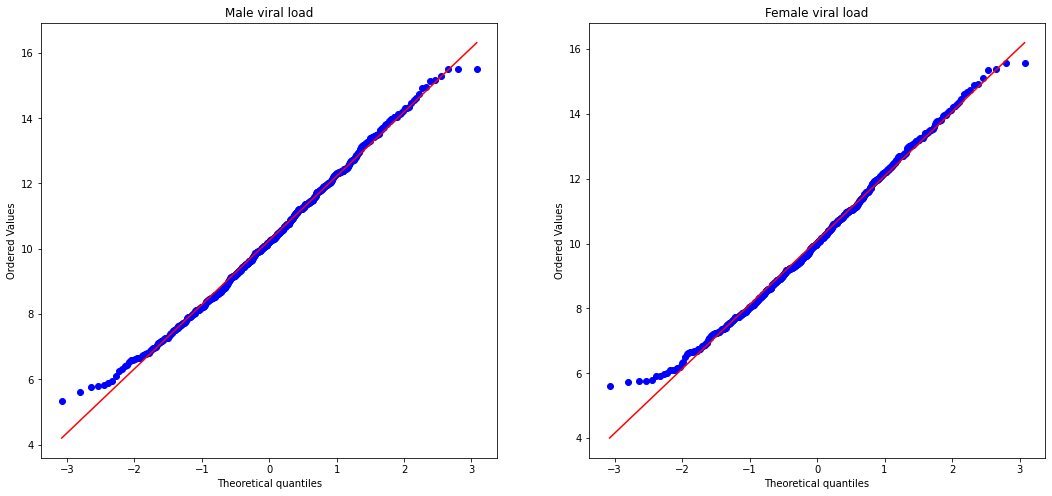

In [32]:
# normality check before and after log transformations
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

stats.probplot(male_vl, plot=axs[0])
stats.probplot(female_vl, plot=axs[1])

axs[0].set_title("Male viral load")
axs[1].set_title("Female viral load")
plt.show()

In [33]:
res = stats.ttest_ind(male_vl, female_vl, alternative='two-sided')
res

Ttest_indResult(statistic=1.4557135626565447, pvalue=0.1457083485811941)

Since p-value is greater than 0.05, we don't have enough evidence to reject null hypothesis. Meaning viral load of females is no differnet from that of males.

# Hypothesis Testing - 3
1. Null Hypothesis: proportion of smoking is same across different regions.
2. Alternate Hypothesis: proportion of smoking is not same across different regions.
3. Significance Level: 0.05
    
Here we will be using chisquare test.

In [34]:
data_table = pd.crosstab(df['smoker'], df['region'])
print("Oberved values:")
data_table

Oberved values:


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [35]:
val = stats.chi2_contingency(data_table)
expected_values = val[3]
expected_values

array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
       [ 66.34977578,  66.55455904,  74.54110613,  66.55455904]])

In [36]:
nrows, ncols = 2, 4
dof = (nrows-1)*(ncols-1)
print(f"degrees of freedom: {dof}")
alpha = 0.0

degrees of freedom: 3


# Help me with suggestions or recommendations if possible in feedback return